In [134]:
# import relevant packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [212]:
traffic_map = gpd.read_file("./map/2city_shape_v3.shp").to_crs(epsg=4326)
traffic_map['geometry'] = traffic_map['geometry'].scale(xfact= 1/100,yfact =1/100, origin = (0,0))

print(traffic_map)

    id     name                                           geometry
0    1    City1  POLYGON ((0.66646 -3.58556, 0.81725 -3.33882, ...
1    2    City2  POLYGON ((13.00588 -2.81356, 13.20662 -2.74107...
2    3   Node_A  POLYGON ((4.65275 -0.85074, 4.81724 -0.76988, ...
3    4   Node_B  POLYGON ((4.82561 -6.53287, 5.05702 -6.49384, ...
4    5   Node_C  POLYGON ((7.45199 -3.78381, 7.6137 -3.68623, 7...
5    6   Node_D  POLYGON ((10.24566 -0.99293, 10.33488 -0.90092...
6    7   Node_E  POLYGON ((10.26518 -6.73362, 10.40458 -6.62209...
7    8  Edge_1A  POLYGON ((3.3995 -3.11049, 4.30284 -2.22387, 4...
8    9  Edge_1B  POLYGON ((3.40507 -5.62814, 3.43574 -5.5891, 4...
9   10  Edge_AC  POLYGON ((5.61324 -2.07053, 5.64391 -2.03707, ...
10  11  Edge_BC  POLYGON ((5.61603 -6.6681, 7.19409 -5.09561, 7...
11  12  Edge_CD  POLYGON ((8.49892 -3.78799, 10.06583 -2.22109,...
12  13  Edge_D2  POLYGON ((11.40412 -2.03707, 12.29631 -2.94041...
13  14  Edge_C2  POLYGON ((8.74706 -4.39301, 8.74149 -4.35119,

In [213]:
#adding vehicles

cars_list = [5,10,20,25]*4


traffic_map.insert(3, "cars", cars_list, True)

#adding textprompts:




def gen_text(string):
    row_index = traffic_map.index[traffic_map['name'] == string].tolist()
    if "City" in string:
        return "City " + string[-1]
    elif 'Node' in string:
        if row_index:
            num_of_car = traffic_map.loc[row_index[0], 'cars']
            return '\n' + string[-1] + f'\n cars: {num_of_car}'
        else:
            return '\n' + string[-1] + '\n cars: Not found'
    elif 'Edge' in string:
        if row_index:
            num_of_car = traffic_map.loc[row_index[0], 'cars']
            return f'cars: {num_of_car}'
        else:
            return 'cars: Not found'
    else:
        return ''


traffic_map['textpromt'] = traffic_map['name'].apply(gen_text)




print(traffic_map)

    id     name                                           geometry  cars   
0    1    City1  POLYGON ((0.66646 -3.58556, 0.81725 -3.33882, ...     5  \
1    2    City2  POLYGON ((13.00588 -2.81356, 13.20662 -2.74107...    10   
2    3   Node_A  POLYGON ((4.65275 -0.85074, 4.81724 -0.76988, ...    20   
3    4   Node_B  POLYGON ((4.82561 -6.53287, 5.05702 -6.49384, ...    25   
4    5   Node_C  POLYGON ((7.45199 -3.78381, 7.6137 -3.68623, 7...     5   
5    6   Node_D  POLYGON ((10.24566 -0.99293, 10.33488 -0.90092...    10   
6    7   Node_E  POLYGON ((10.26518 -6.73362, 10.40458 -6.62209...    20   
7    8  Edge_1A  POLYGON ((3.3995 -3.11049, 4.30284 -2.22387, 4...    25   
8    9  Edge_1B  POLYGON ((3.40507 -5.62814, 3.43574 -5.5891, 4...     5   
9   10  Edge_AC  POLYGON ((5.61324 -2.07053, 5.64391 -2.03707, ...    10   
10  11  Edge_BC  POLYGON ((5.61603 -6.6681, 7.19409 -5.09561, 7...    20   
11  12  Edge_CD  POLYGON ((8.49892 -3.78799, 10.06583 -2.22109,...    25   
12  13  Edge

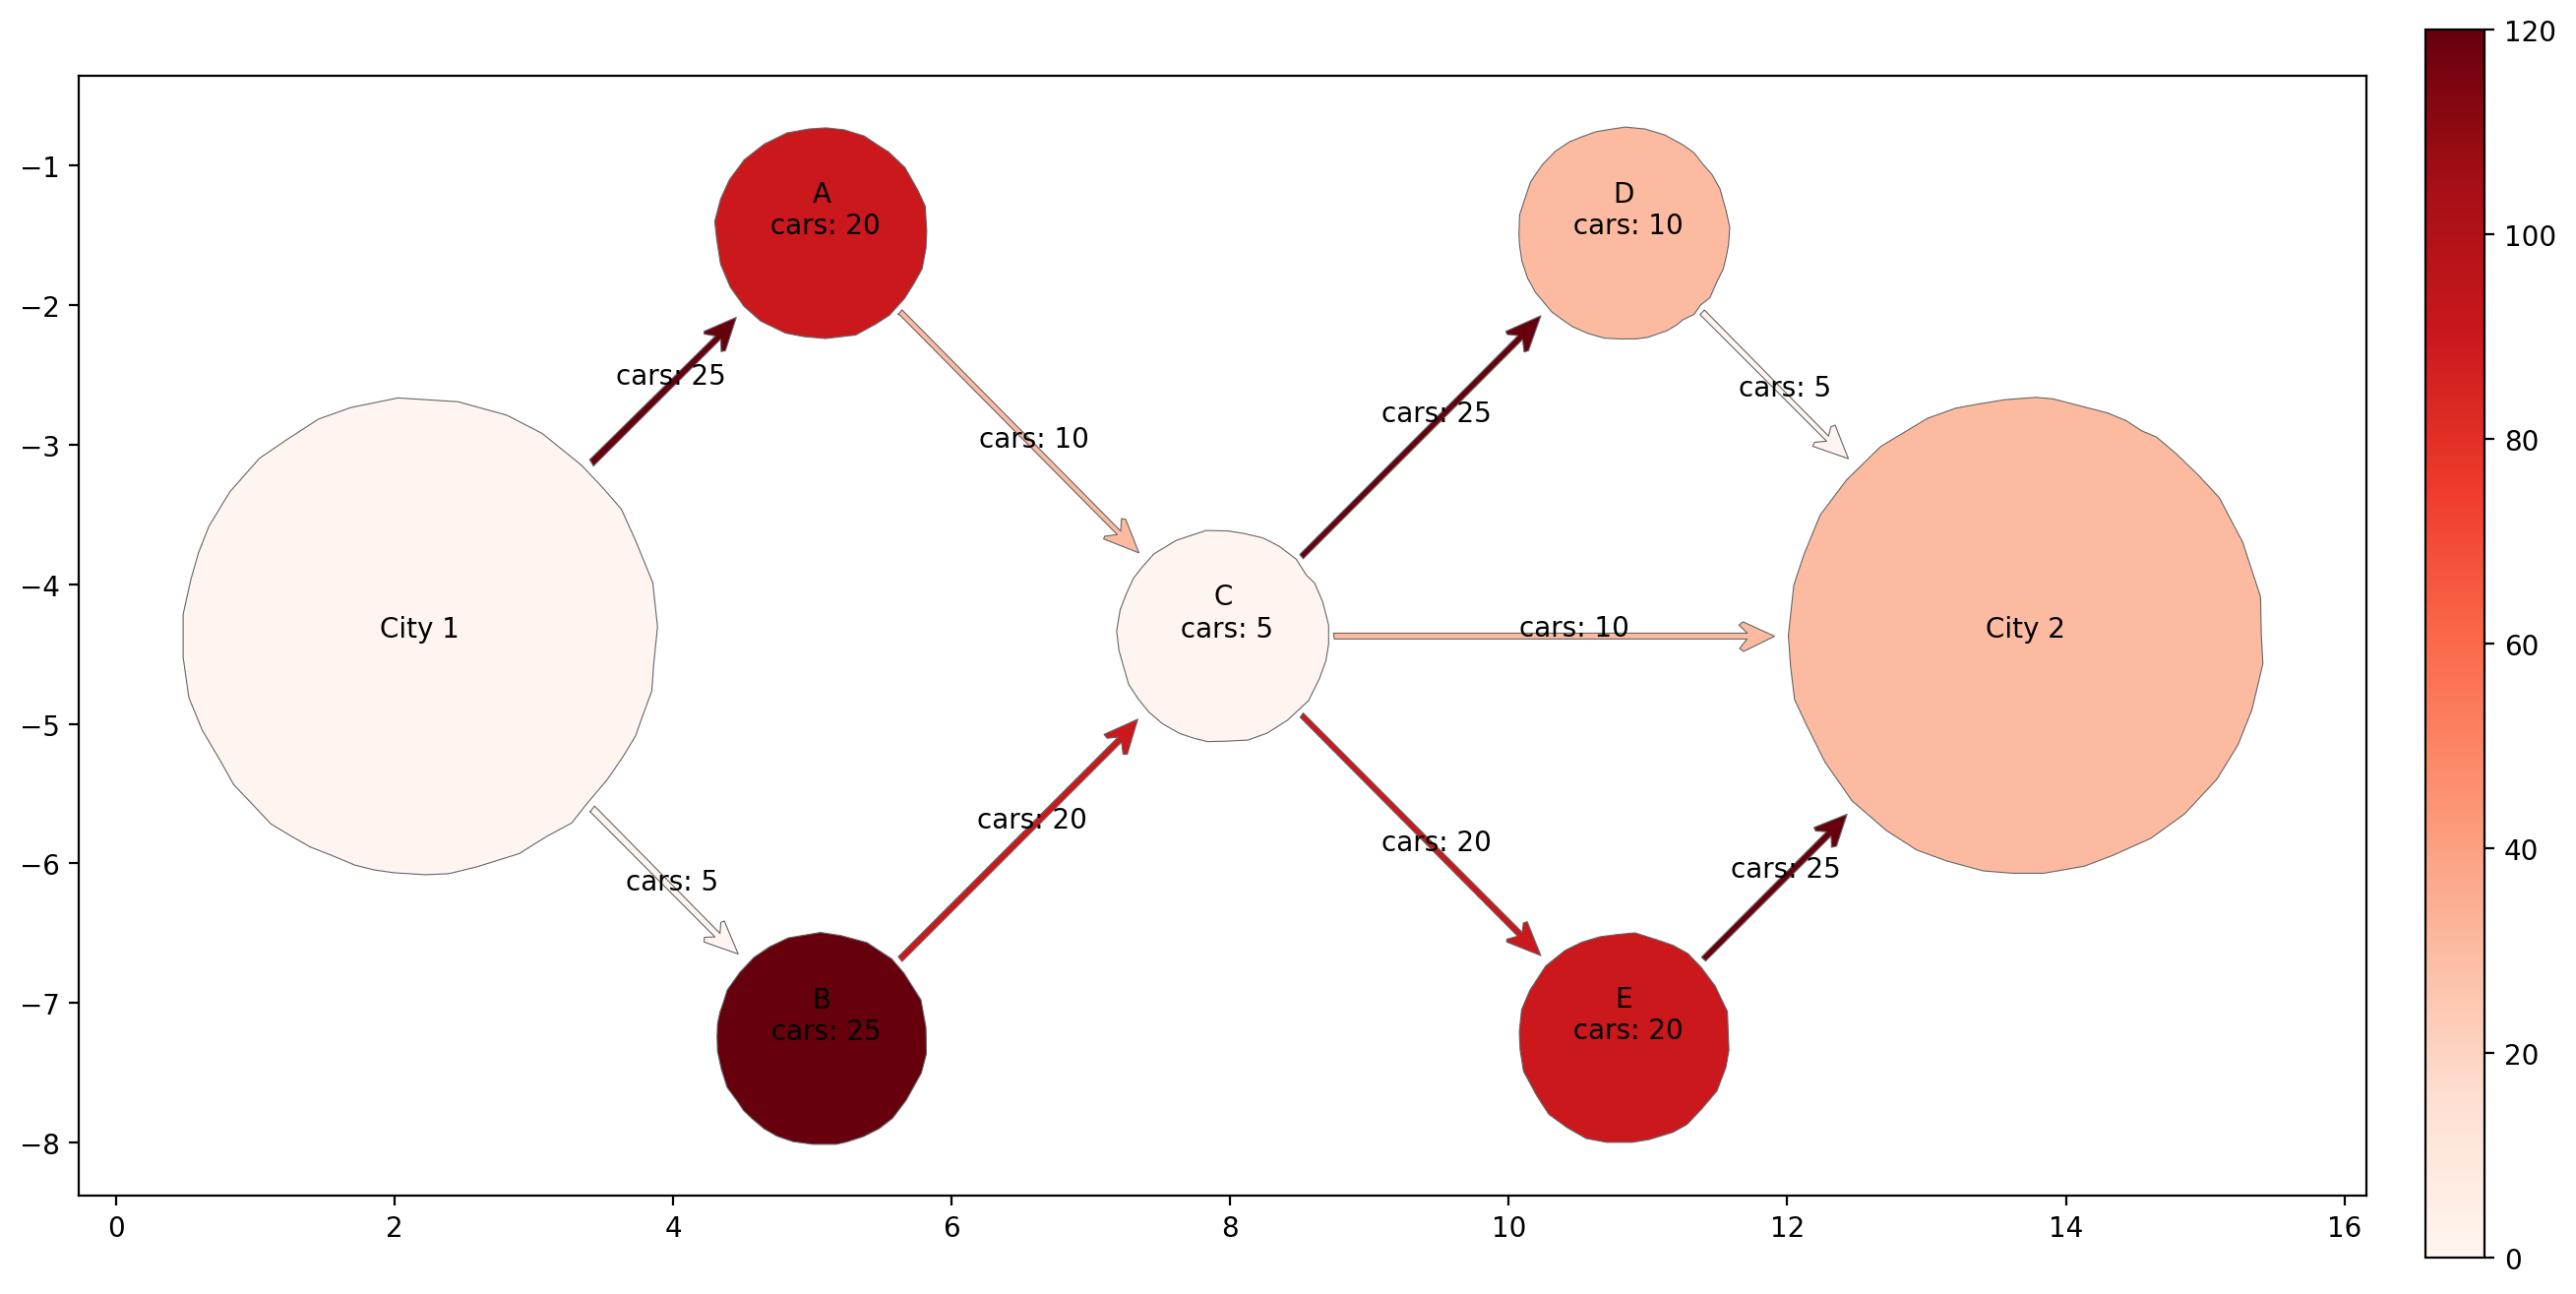

In [210]:
fig, ax = plt.subplots(1, figsize=(15, 8),dpi = 200)
traffic_map.plot(column="cars", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
#creating labels
traffic_map.apply(lambda x: ax.annotate(text=x['textpromt'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

# Create a colorbar
cax = fig.add_axes([0.92, 0.1, 0.02, 0.78])  # Adjust the position and size as needed
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=120))
bar_info._A = []
cbar = fig.colorbar(bar_info, cax=cax)

